In [1]:
import numpy as np
import os
np.random.seed(10)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

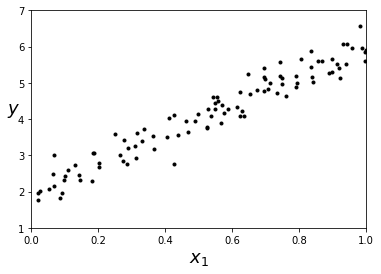

In [10]:
X = np.random.rand(100,1)
y =  4 * X +  2 + 0.3* np.random.randn(100, 1)

def plot_data(X, y, axis=None):
    plt.plot(X, y, 'k.')
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    if axis is not None:
        plt.axis(axis)
plot_data(X, y, [0, 1, 1, 7])

In [11]:
X_b = np.hstack((np.ones((100,1)), X))
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
w

array([[1.98449947],
       [4.04241597]])

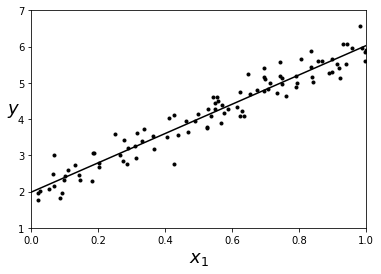

In [12]:
X_new = [[0], [1]]
X_new_b = np.hstack((np.ones((2,1)), X_new))
y_pred = X_new_b.dot(w)

plot_data(X, y, [0, 1, 1, 7])
plt.plot(X_new, y_pred, 'k')

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(array([1.98449947]), array([[4.04241597]]))

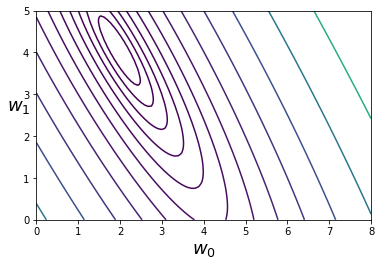

In [14]:
def plot_cost(x):
    w0s = np.linspace(0, 8, 100)
    w1s = np.linspace(0, 5, 100)
    m = 100
    cost = np.zeros((100, 100))
    for i, w0 in enumerate(w0s):
        for j, w1 in enumerate(w1s):
            w = [[w0], [w1]]
            cost[i, j] = 2/m * (x.dot(w) - y).T.dot(x.dot(w) - y)

    V = np.logspace(np.log10(np.min(cost)), np.log10(np.max(cost)),14)

    plt.contour(w0s,w1s,cost.T,V)
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$", fontsize=18)
    plt.ylabel("$w_1$",  rotation=0, fontsize=18)

plot_cost(X_b)

In [15]:

learning_rate = 0.1
n_iter = 800
m = len(X_b)

W = np.array([[0.1], [0.2]])
Ws = []
Ws.append(W)
gradients = []

for iteration in range(n_iter):
    gradient = 2/m * X_b.T.dot(X_b.dot(W) - y) 
    gradients.append(gradient)
    W = W - learning_rate * gradient
    Ws.append(W)
W

array([[1.98453775],
       [4.04234912]])

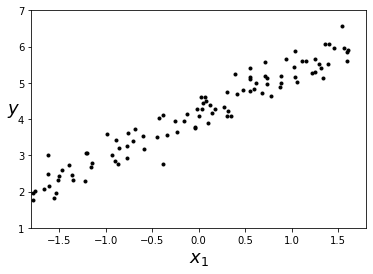

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_b = np.hstack((np.ones((100,1)), X_scaled))

plot_data(X_scaled, y, [-1.8, 1.8, 1, 7])

In [18]:
np.random.seed(3)

learning_rate = 0.1
n_iter = 100
m = 100
Ws = []
W = [[0.1], [0.2]]
Ws.append(W)
for iteration in range(n_iter):
    gradients = 2/m * X_scaled_b.T.dot(X_scaled_b.dot(W) - y)
    W = W - learning_rate * gradients
    Ws.append(W)

(0, 5)

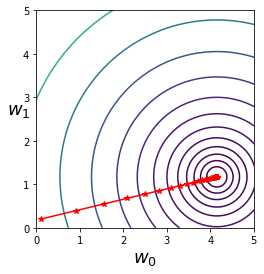

In [22]:
plot_cost(X_scaled_b)
Ws = np.array(Ws)
plt.plot(Ws[:,0], Ws[:,1], 'r-*')
plt.xlim([0,5])

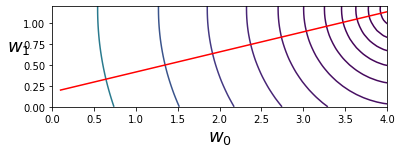

epoch=100, w0=4.150, w1=1.171


In [29]:
batch_size = 100

np.random.seed(3)
n_samples = len(X_scaled_b)
learning_rate = 0.1
n_epochs = 100

m = 100
Ws = []
W = [[0.1], [0.2]]
Ws.append(W)
n_samples = X_scaled_b.shape[0]

def fetch_batch(batch_size, iteration, epoch):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration*batch_size:(iteration+1)*batch_size]
    return X_scaled_b[batch_indices, :], y[batch_indices, :]

for epoch in range(n_epochs):
    for iteration in range(n_samples // batch_size):
        X_batch, y_batch = fetch_batch(batch_size, iteration, epoch)
        gradients = 2/m * X_batch.T.dot(X_batch.dot(W) - y_batch)
        W = W - learning_rate * gradients
        Ws.append(W)

Ws = np.array(Ws)
plot_cost(X_scaled_b)
plt.plot(Ws[:,0], Ws[:,1], 'r-')
plt.axis([0, 4, 0, 1.2])
plt.show()

print('epoch={0:}, w0={1:.3f}, w1={2:.3f}'.format(n_epochs, Ws[-1,0,0],Ws[-1,1,0]))

In [30]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=100, penalty=None, learning_rate='constant', eta0=0.1)
model.fit(X_scaled, y.ravel())
model.intercept_, model.coef_

(array([4.17128742]), array([1.10406217]))

In [36]:
np.random.seed(10)
m = 100
X = np.random.rand(m,1)
y =  (X-0.5)**2 + 0.02* np.random.randn(m, 1)

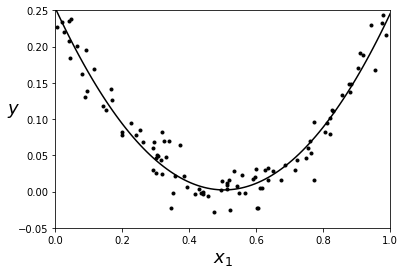

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_poly = np.hstack((X, X**2))
model.fit(X_poly, y)

X_new = np.linspace(0, 1, 100).reshape(-1,1)
X_poly_new = np.hstack((X_new, X_new**2))
y_poly_new = model.predict(X_poly_new)

plot_data(X, y, [0, 1, -0.05, 0.25])
plt.plot(X_new, y_poly_new, 'k')